# Laplacian Eigenmaps

## Authors:
- Bassi Giuseppe
- Varazi Lavinia

## Requirements:
- matplotlib
- numpy
- scikit-learn

## The notebook will:
1. Load and preprocess the dataset
2. Perform exploratory data analysis
3. Apply dimensionality reduction techniques (PCA, Laplacian Eigenmaps, Spectral Clustering)
4. Visualize the results using various plots

## Returns:
None. Displays plots and visualizations to show the result of the Laplacian Eigenmaps method on manifolds.

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

# Laplacian Eigenmaps
We are going to show the result of the Laplacian Eigenmaps method on given manifolds. The idea is to sample points at random on a manifold and see how well does the algorithm "unfold" the figure into a lower dimensional space. 

We start from the S-shaped curve and, in order, see how PCA, Laplacian Eigenmaps and Spectral Clustering work on it. We can notice how the Laplacian Eigenmaps alogithm is very effective in unrolling the S. 

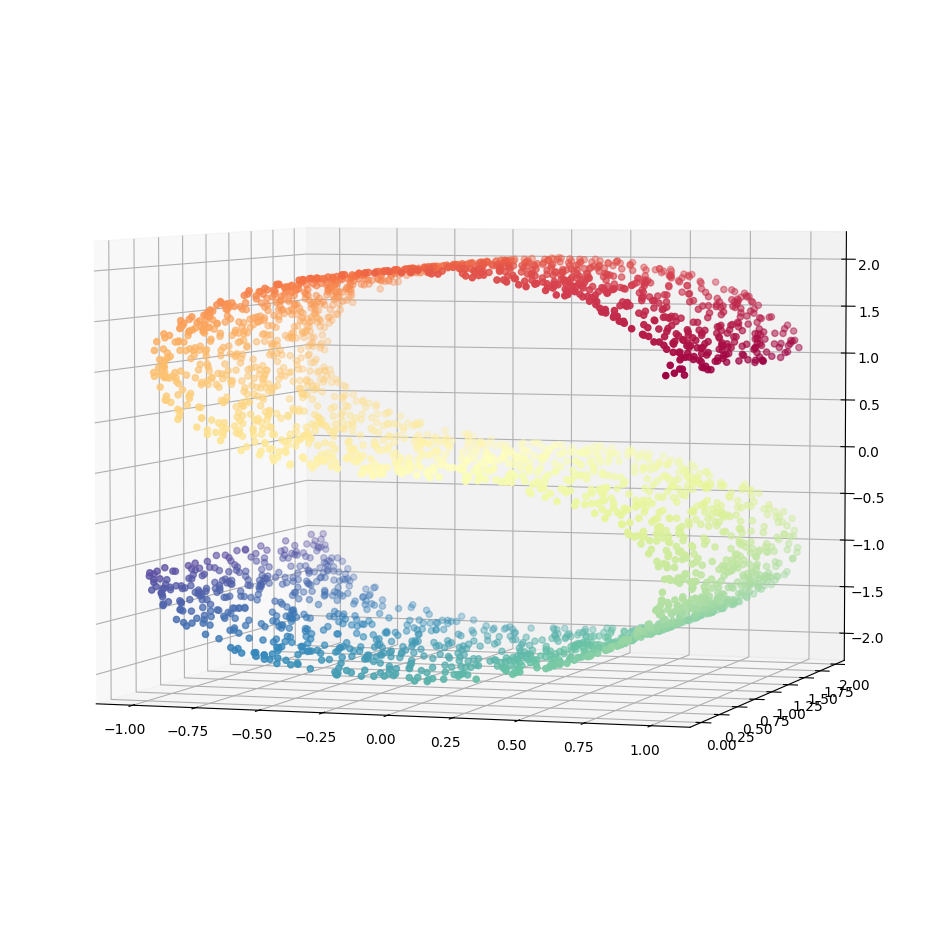

In [2]:
# Define the number of points to consider. 
n_points = 3000

# Get the data and color map. 
S_curve, S_colors = datasets.make_s_curve(n_points, random_state=0)

Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors, 
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

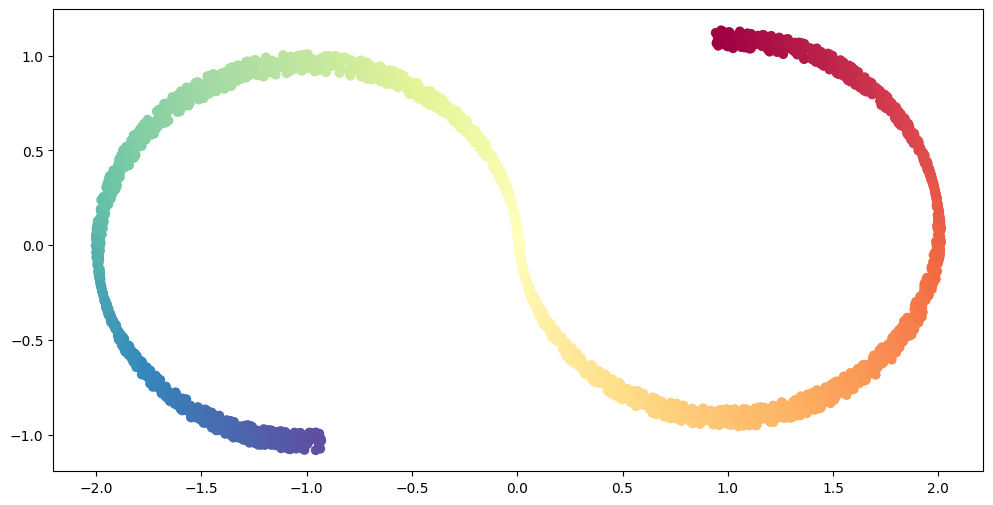

In [3]:
# Fit PCA object.
S_curve_pca = PCA(n_components=2).fit_transform(S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_pca[:, 0], S_curve_pca[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral)

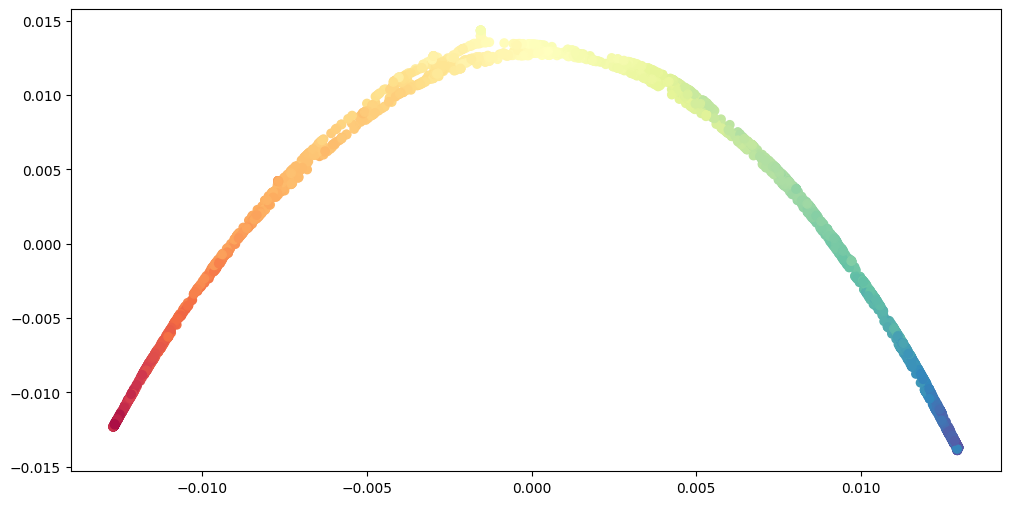

In [4]:
# Set the number of n_neighbors;
n_neighbors = 5

# Set the dimension of the target space. 
n_components = 2

# Construct the SpectralEmbedding object. 
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object. 
S_curve_red = se.fit_transform(X=S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_red[:, 0], S_curve_red[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral)

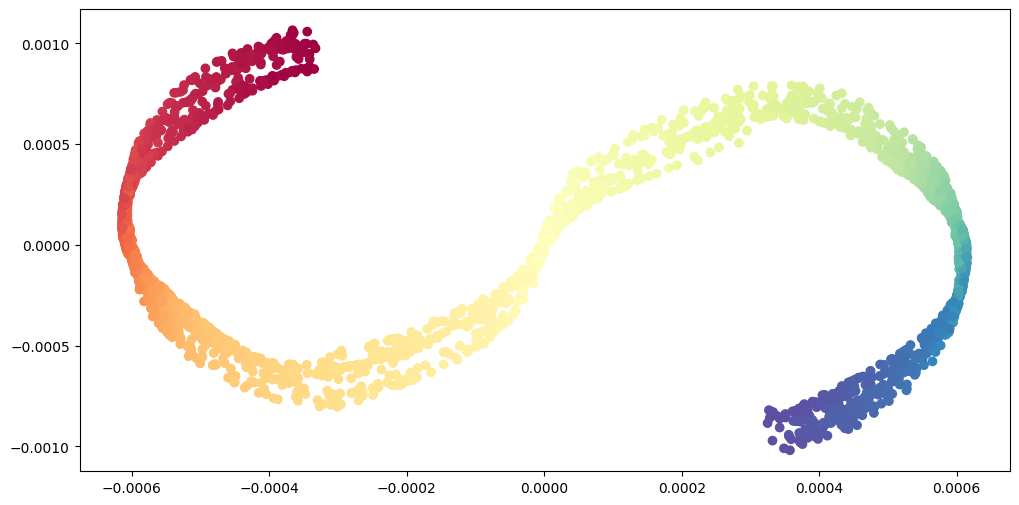

In [5]:
# Set the number of n_neighbors;
n_neighbors = 1500 

# Set the dimension of the target space. 
n_components = 2

# Construct the SpectralEmbedding object. 
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object. 
S_curve_red = se.fit_transform(X=S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_red[:, 0], S_curve_red[:, 1],
           c=S_colors, 
           cmap=plt.cm.Spectral)

We now continue out analysis by repeating the same comparison, this time on a sphere that has been sliced. In particular, while the other methods are not able to work well on convex shapes, Laplacian Eigenmaps succeed in opening the manifold. 

In [6]:
# Create our sphere.
n_samples = 5000

angle_parameter = 0.5 # Try 0.01
pole_hole_parameter = 8 # Try 50

random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - angle_parameter)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / pole_hole_parameter))) & 
           (t > ((np.pi / pole_hole_parameter))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
          np.sin(t[indices]) * np.sin(p[indices]), \
          np.cos(t[indices])
        
sphere_data = np.array([x, y, z]).T

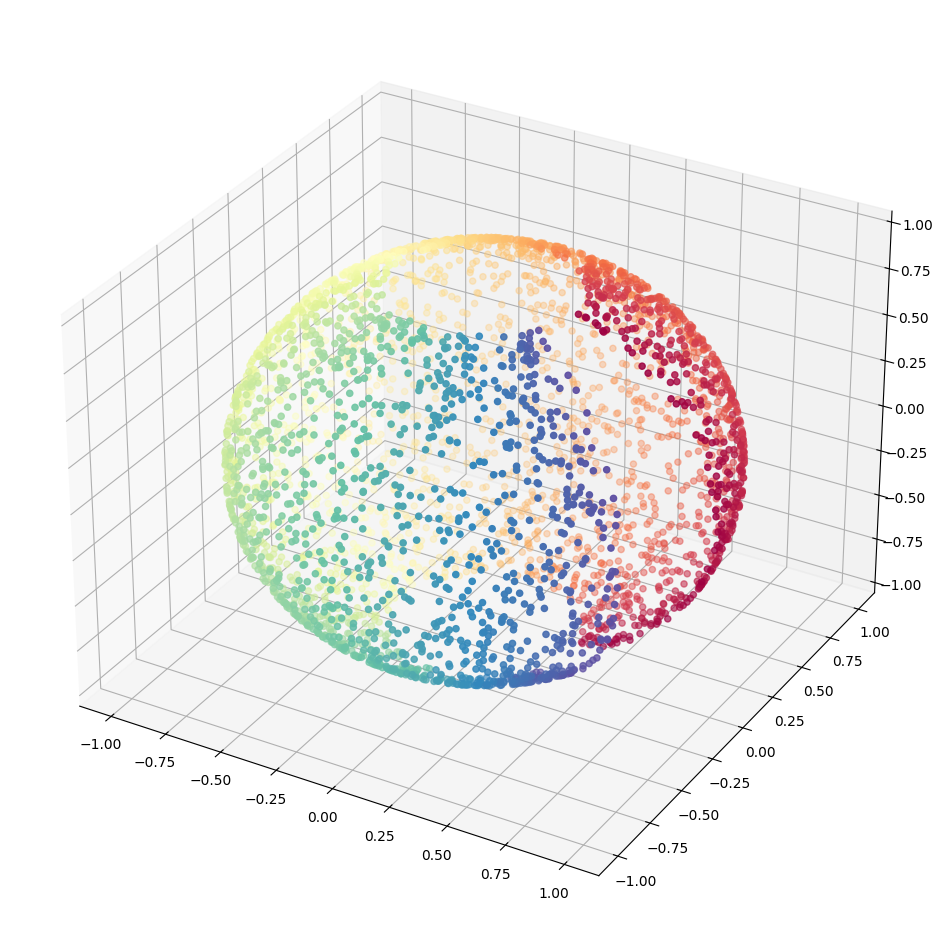

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           c=colors, 
           cmap=plt.cm.Spectral);

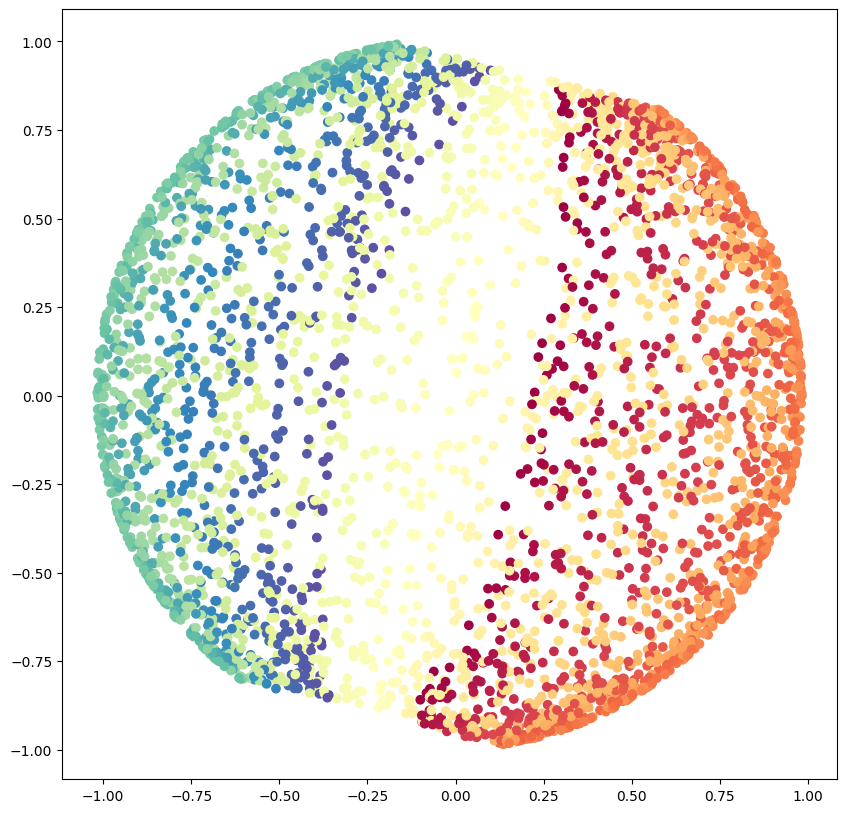

In [8]:
sphere_pca = PCA(n_components=2).fit_transform(sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_pca[:, 0], sphere_pca[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral);

In [9]:
n_neighbors = 8
n_components = 2

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

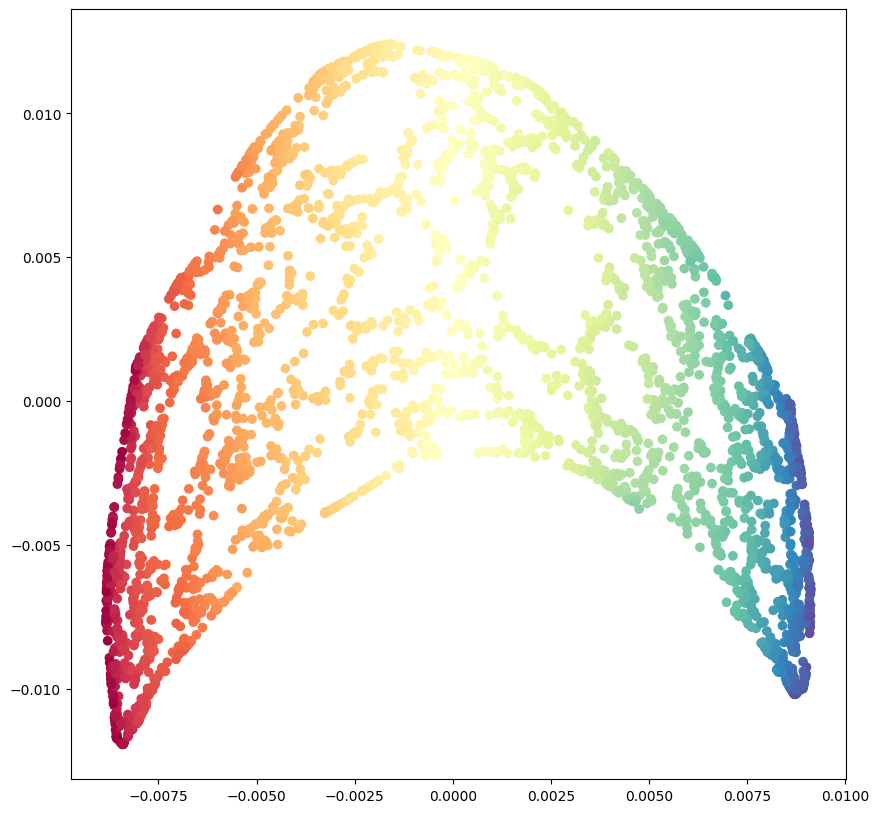

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral)

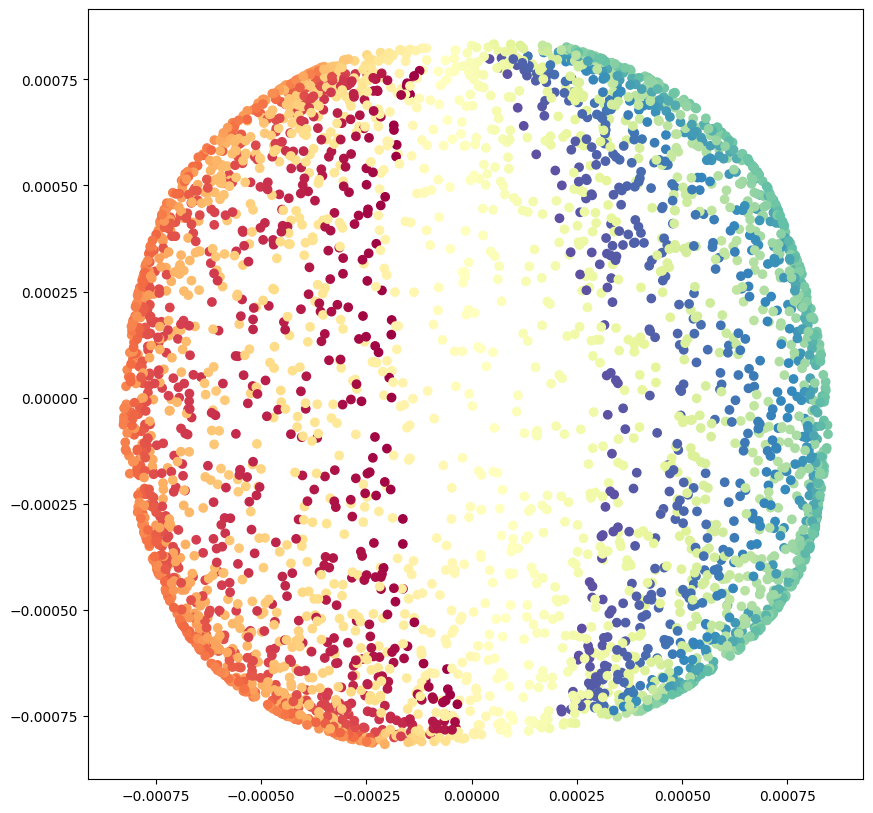

In [11]:
n_neighbors = 1000

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors, 
           cmap=plt.cm.Spectral)

### References: 
Dr. Juan Camilo Orduz: https://juanitorduz.github.io/